In [1]:
import pandas as pd
import numpy as np
import re
import xgboost as xgb
from sklearn.model_selection import train_test_split
from haversine import haversine
from sklearn.metrics import fbeta_score, precision_score, recall_score

import matplotlib.pyplot as plt
%matplotlib inline
from common import load_clean_train, load_clean_test, load_midpoint_id, \
    extract_dates, add_midpoint_loc_id, tt_join_city_stats2clean, load_clean_parking,\
    add_yelp, add_parking_vecs, get_XY, premodel_formating2

In [2]:
train_df = load_clean_train()
test_df = load_clean_test()
print(train_df.shape, test_df.shape)

train_df = extract_dates(train_df)
simple = train_df.copy()
test_df = extract_dates(test_df)
simple_test = test_df.copy()
print(train_df.shape, test_df.shape)

train_df = add_midpoint_loc_id(train_df)
test_df = add_midpoint_loc_id(test_df)
print(train_df.shape, test_df.shape)

train_df = tt_join_city_stats2clean(train_df)
test_df = tt_join_city_stats2clean(test_df)
print(train_df.shape, test_df.shape)

train_df = add_yelp(train_df)
test_df = add_yelp(test_df)
print(train_df.shape, test_df.shape)

train_df = add_parking_vecs(train_df)
test_df = add_parking_vecs(test_df)
print(train_df.shape, test_df.shape)



(1100, 18) (726, 16)
(1100, 26) (726, 24)
(1100, 27) (726, 25)
(1100, 31) (726, 29)
(1100, 316) (726, 314)
(1100, 340) (726, 338)


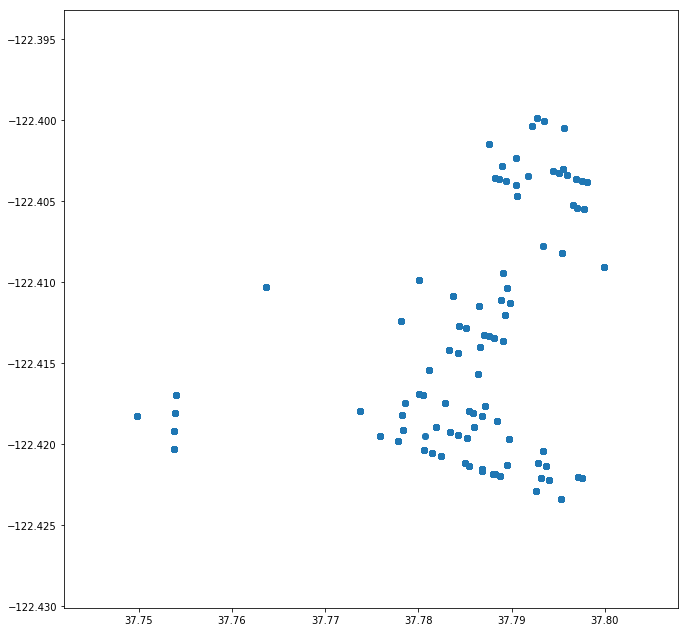

In [8]:
fig = plt.figure(figsize=(11,11))
plt.scatter(train_df['lat_mid_y'], train_df['lng_mid_y'])